In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data = pd.read_csv(r'C:\Users\USER\Downloads\data.csv')

In [ ]:
comments = data['comment'].values
labels = data['attack'].values

In [ ]:
max_samples = 50000  # Choose a smaller number of samples to use
comments = comments[:max_samples]
labels = labels[:max_samples]


In [ ]:
# Convert the comments to strings
comments = [str(comment) for comment in comments]

In [ ]:
# Tokenize the comments
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)

In [ ]:
# Pad sequences
max_len = 200  # Set a maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, random_state=42)


In [ ]:
# Tokenize the comments
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:

# Pad sequences to a fixed length
max_sequence_length = 200
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [ ]:

# Define the dimensions
vocab_size = len(tokenizer.word_index) + 1
latent_dim = 100


In [ ]:
# Define the generator model
generator = Sequential()
generator.add(Embedding(vocab_size, latent_dim, input_length=max_sequence_length))
generator.add(LSTM(256))
generator.add(Dense(1, activation='sigmoid'))

In [ ]:
# Define the discriminator model
discriminator = Sequential()
discriminator.add(Embedding(vocab_size, latent_dim, input_length=max_sequence_length))
discriminator.add(LSTM(256))
discriminator.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])

# D

In [ ]:
# Define the GAN model
gan = Sequential()
gan.add(generator)
gan.add(discriminator)

In [ ]:
# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002))


In [ ]:
# Set training parameters
epochs = 10
batch_size = 32


In [ ]:
# Training loop
for epoch in range(epochs):
    for _ in range(len(X_train) // batch_size):
        # Generate fake comments using the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_comments = generator.predict(noise)

        # Select a random batch of real comments
        real_comments = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

        # Combine real and fake comments as training data
        X = np.concatenate([real_comments, fake_comments])
        y = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])

        # Train the discriminator
        discriminator_loss = discriminator.train_on_batch(X, y)

        # Generate noise for training the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Set the target labels for the generator
        y = np.ones((batch_size, 1))

        # Train the generator
        generator_loss = gan.train_on_batch(noise, y)

    # Print the losses for each epoch
    print(f'Epoch {epoch+1}/{epochs} - Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}')

C:\Users\USER\AppData\Local\Temp\ipykernel_9416\3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\USER\AppData\Local\Temp\ipykernel_9416\3510424060.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


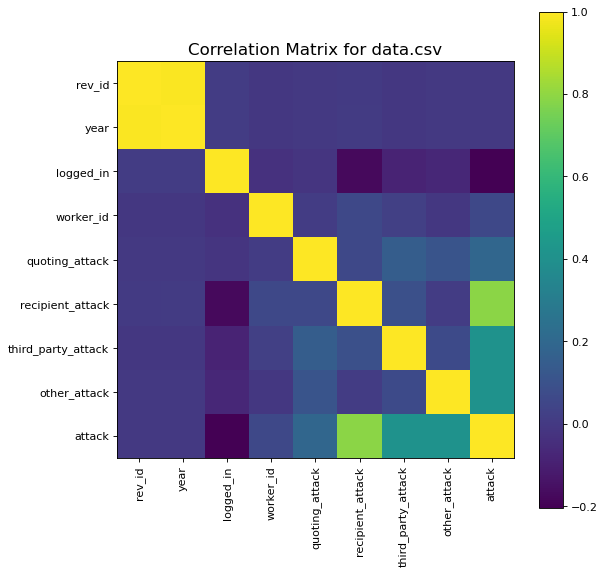